In [461]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk

In [462]:
print('Task #1. Under/Oversampling')

Task #1. Under/Oversampling


In [463]:
header_names = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca','Ba','Fe','Type']
df = pd.read_csv(r'C:\Users\user\Documents\glass_mushrooms/glass.data', sep=',', names=header_names, index_col='Id')

In [464]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [465]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


In [466]:
df.describe(include="all")

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [467]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


In [469]:
y_df = df['Type']

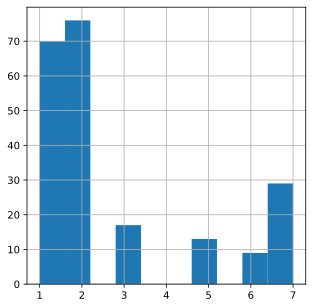

In [470]:
y_df.hist(figsize=(5, 5));

In [471]:
print('The Target set is unbalanced and skewed from classes 1 and 2 and should be oversampled')

The Target set is unbalanced and skewed from classes 1 and 2 and shoud be oversampled


In [472]:
x_df = df.drop(['Type'],axis=1)

In [473]:
print('Try to Add synthetic features')
x_df['RItoCa'] = x_df['RI'] / x_df['Ca']
x_df['AltoSi'] = x_df['Al'] / x_df['Si']

Try to Add synthetic features


In [474]:
from sklearn.preprocessing import MinMaxScaler
print("Dataset features normalization")
scaler = MinMaxScaler()
num_cols = x_df.select_dtypes(include='number').columns
for c in num_cols:
    x_df[c] = scaler.fit_transform(x_df[[c]])

Dataset features normalization


Correlation matrix (numeric features and metrics)


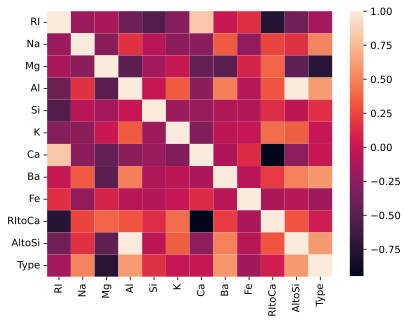

In [475]:
print('Correlation matrix (numeric features and metrics)')
df1 = pd.concat([x_df, y_df], axis=1)
corr_matrix = df1.corr()
sns.heatmap(corr_matrix);

PairPlots


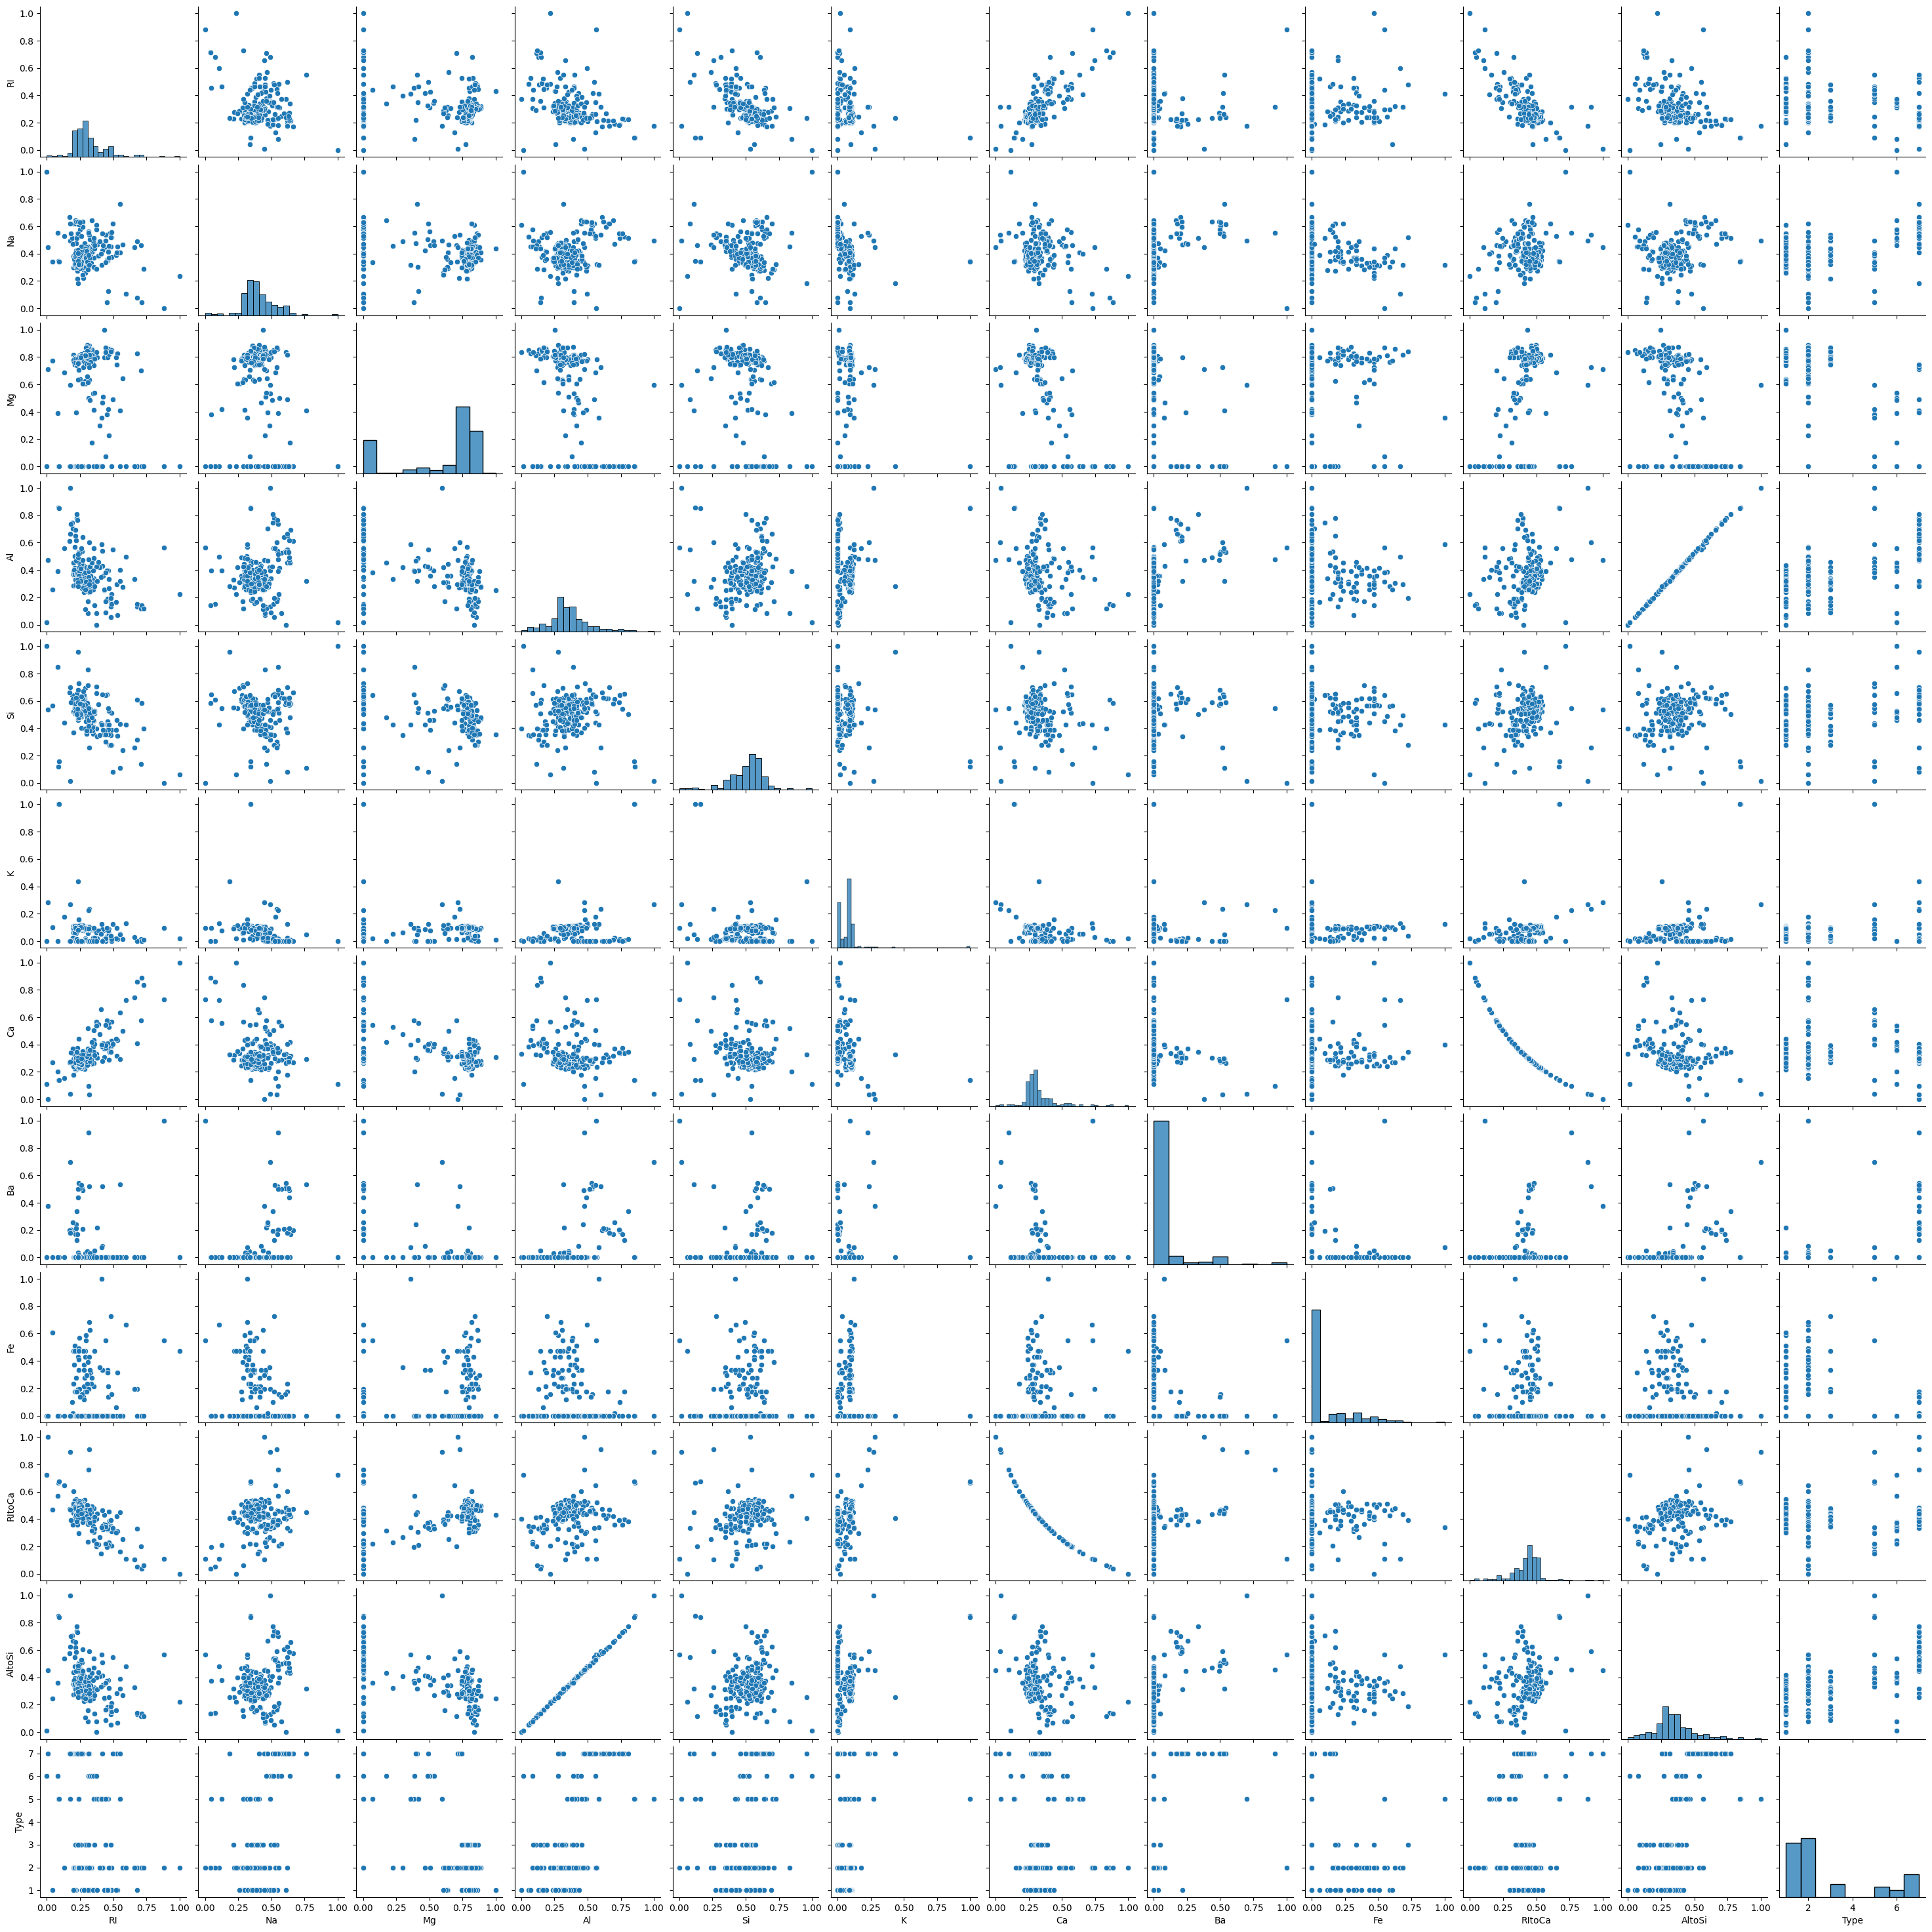

In [476]:
print('PairPlots')
%config InlineBackend.figure_format = 'png'
df1 = pd.concat([x_df, y_df], axis=1)
sns.pairplot(df1);

In [477]:
%config InlineBackend.figure_format = 'svg'

In [478]:
x_df = x_df.drop(['Ca', 'Al'],axis=1)
x_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 1 to 214
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Si      214 non-null    float64
 4   K       214 non-null    float64
 5   Ba      214 non-null    float64
 6   Fe      214 non-null    float64
 7   RItoCa  214 non-null    float64
 8   AltoSi  214 non-null    float64
dtypes: float64(9)
memory usage: 16.7 KB


PairPlots


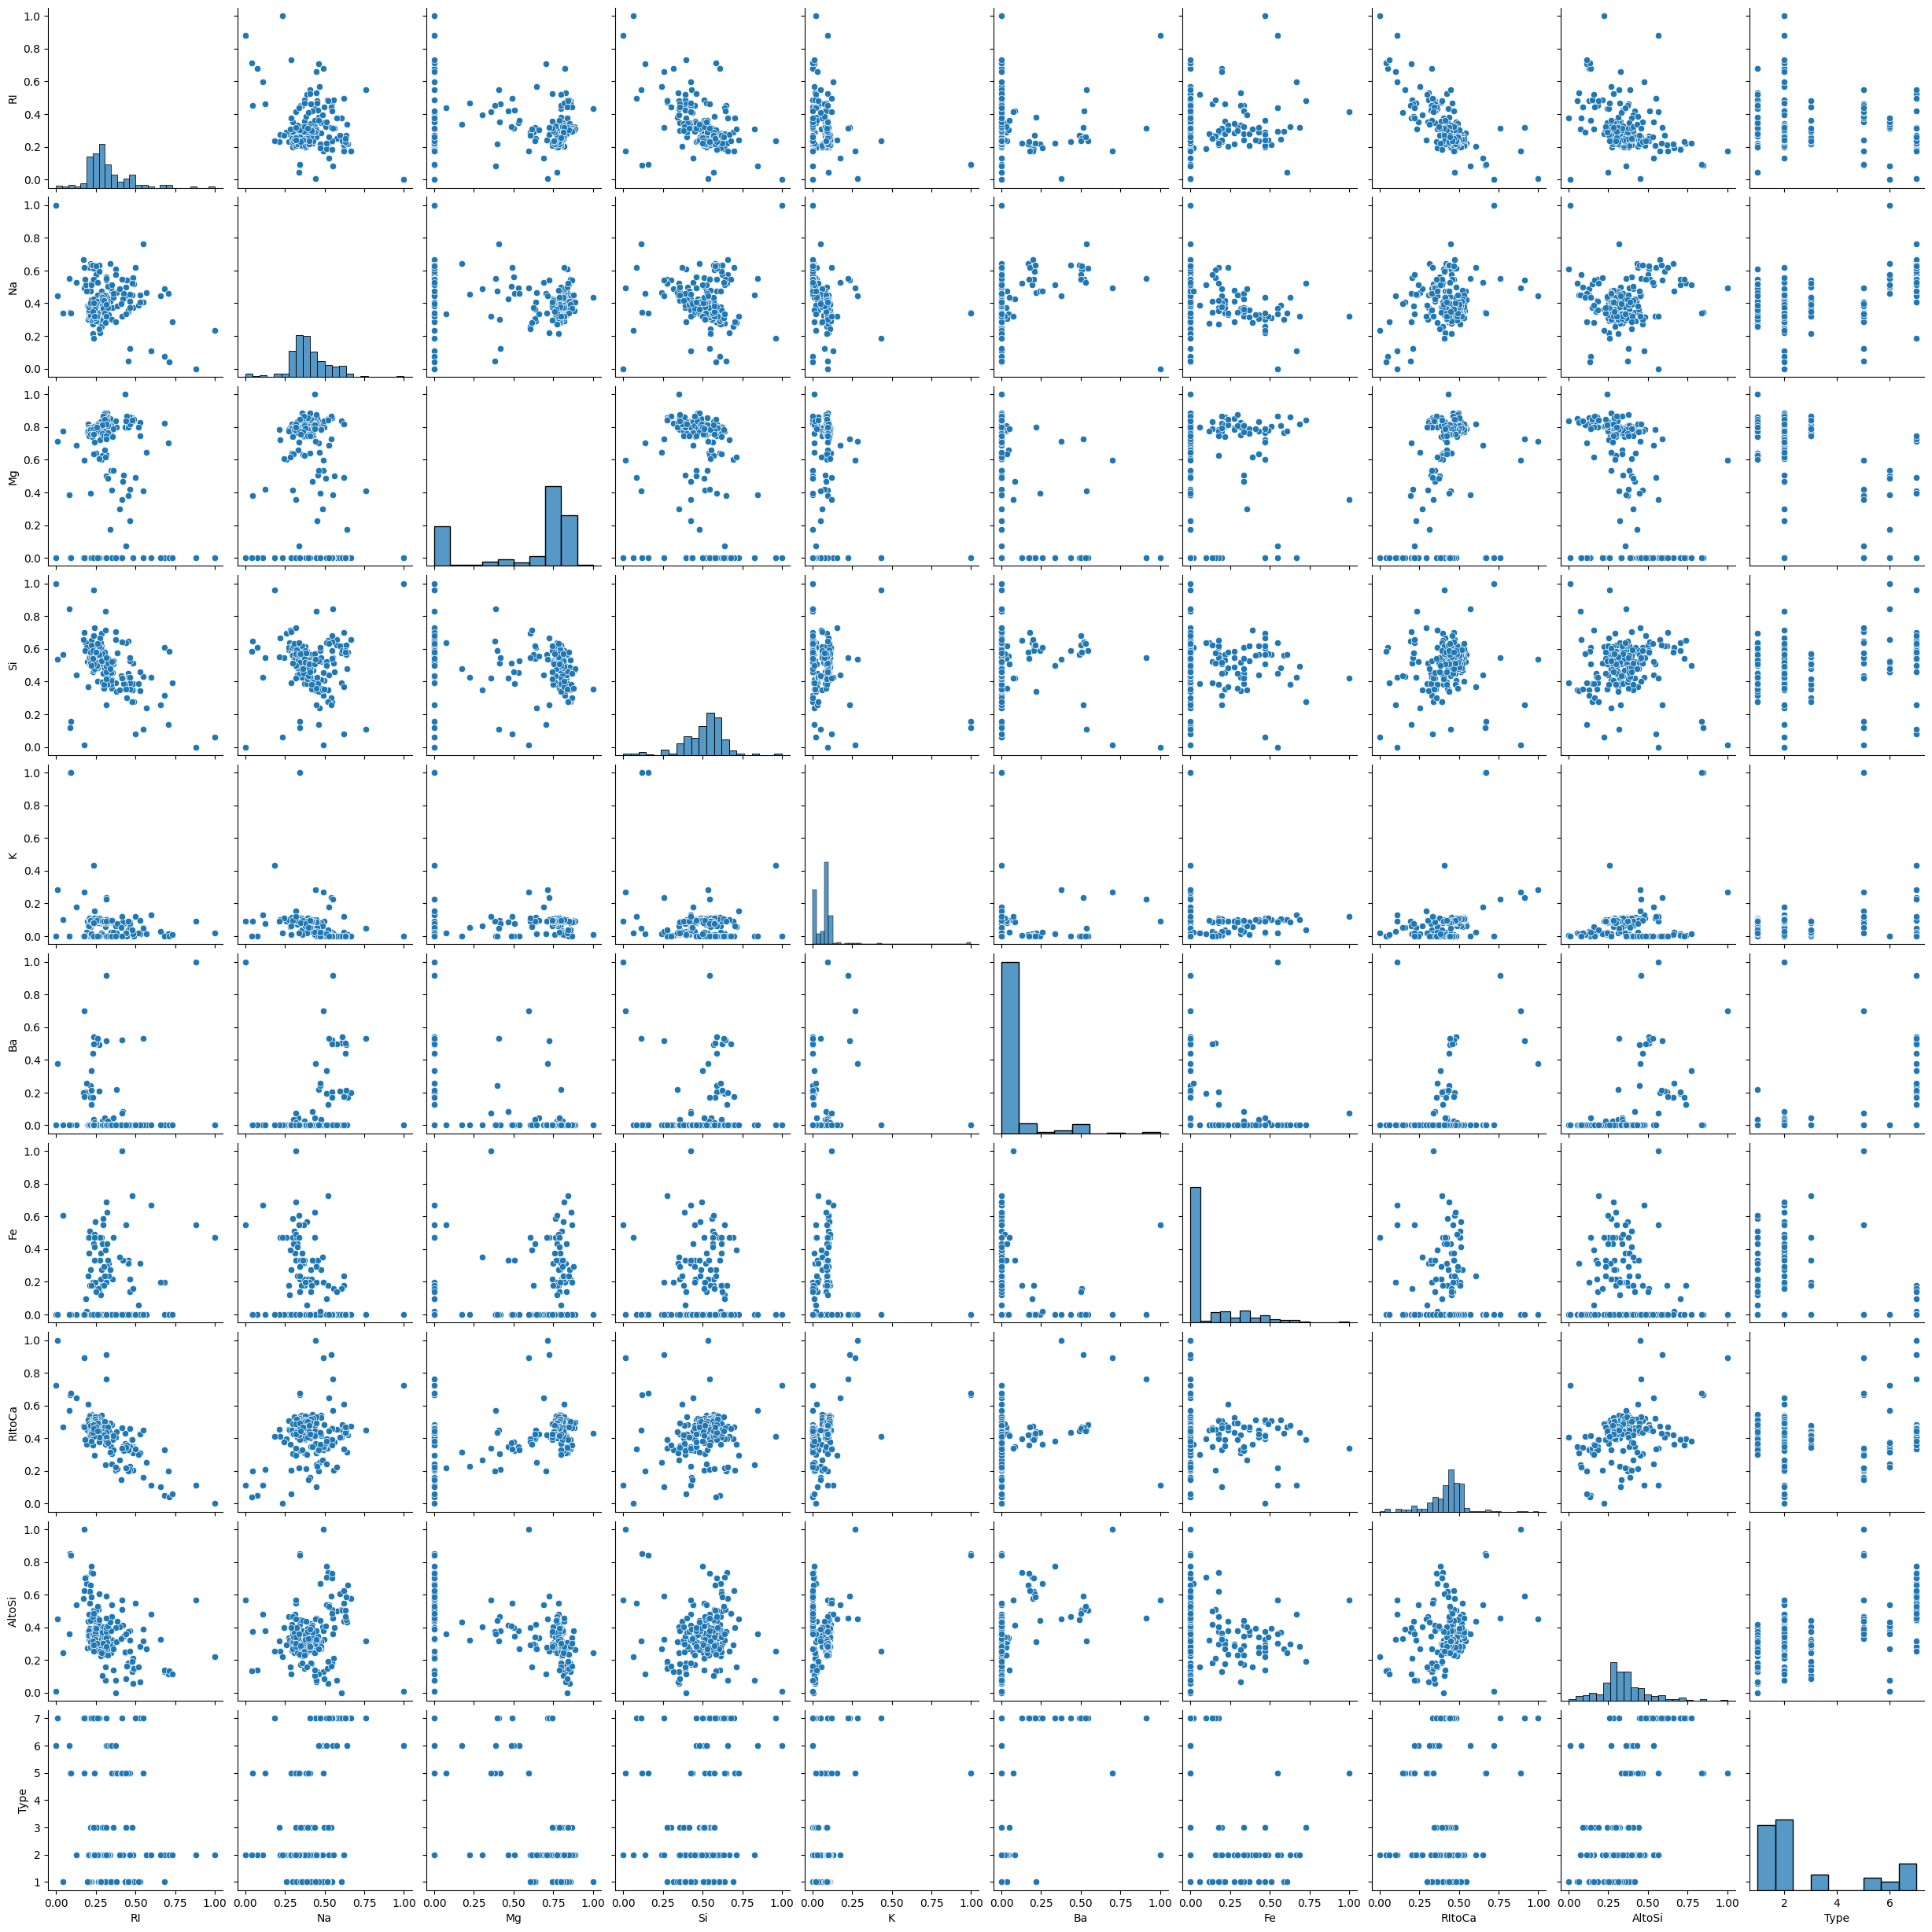

In [479]:
print('PairPlots')
%config InlineBackend.figure_format = 'png'
df1 = pd.concat([x_df, y_df], axis=1)
sns.pairplot(df1);

In [480]:
%config InlineBackend.figure_format = 'svg'

In [481]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [482]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.3, random_state=17)
print('Lengths:', len(x_train), len(x_valid), len(x_test))

Lengths: 119 52 43


In [483]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [484]:
def check_classification_model(r, x_v, y_v):
    y_p = r.predict(x_v)
    cm = confusion_matrix(y_v, y_p)
    print('Confusion matrix:')
    print(cm)
    return accuracy_score(y_v, y_p), \
precision_score(y_v, y_p, average='macro', zero_division=1), \
recall_score(y_v, y_p, average='macro'), \
f1_score(y_v, y_p, average='macro')

In [485]:
clf = LogisticRegression(multi_class='ovr', solver='lbfgs')
clf = clf.fit(x_train, y_train)
acc, pr, rc, f1 = check_classification_model(clf, x_valid, y_valid)
print(f'Linear regression model validation metrics: Accuracy: {acc} Precision: {pr} Recall: {rc} F-score: {f1}')

Confusion matrix:
[[11  5  0  0  0  0]
 [ 4 15  0  0  0  2]
 [ 4  0  0  0  0  0]
 [ 0  0  0  0  0  2]
 [ 0  2  0  0  0  0]
 [ 1  0  0  0  0  6]]
Linear regression model validation metrics: Accuracy: 0.6153846153846154 Precision: 0.8053030303030303 Recall: 0.3764880952380953 F-score: 0.33577798044282314


In [486]:
print('The dataset should be adjusted to make the model more sensitive to the minority target classes via oversampling')

The dataset should be adjusted to make the model more sensitive to the minority target classes via oversampling


In [487]:
print('Try to oversample the dataset with Random oversampling method')
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=0)
x_df, y_df = oversampler.fit_resample(x_df, y_df)
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.3, random_state=17)
print('Lengths:', len(x_train), len(x_valid), len(x_test))
clf = LogisticRegression(multi_class='ovr', solver='lbfgs')
clf = clf.fit(x_train, y_train)
acc, pr, rc, f1 = check_classification_model(clf, x_valid, y_valid)
print(f'Linear regression model validation metrics: Accuracy: {acc} Precision: {pr} Recall: {rc} F-score: {f1}')

Try to oversample the dataset with Random oversampling method
Lengths: 254 110 92
Confusion matrix:
[[11  0  7  0  0  0]
 [ 8  1  6  2  0  0]
 [ 8  0 11  0  0  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0  0 15  0]
 [ 2  0  1  4  0 14]]
Linear regression model validation metrics: Accuracy: 0.6545454545454545 Precision: 0.7647568523430591 Recall: 0.6525914459350991 F-score: 0.6247935724808991


In [488]:
print('As we can see the result is much better')

As we can see the result is much better


In [489]:
print('Lets try to apply SMOTE, ADASYN Borderline-SMOTE methods')

Lets try to apply SMOTE, ADASYN Borderline-SMOTE methods


In [490]:
print('SMOTE')
from imblearn.over_sampling import SMOTE
oversampler = SMOTE()
x_df, y_df = oversampler.fit_resample(x_df, y_df)
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.3, random_state=17)
print('Lengths:', len(x_train), len(x_valid), len(x_test))
clf = LogisticRegression(multi_class='ovr', solver='lbfgs')
clf = clf.fit(x_train, y_train)
acc, pr, rc, f1 = check_classification_model(clf, x_valid, y_valid)
print(f'Linear regression model validation metrics: Accuracy: {acc} Precision: {pr} Recall: {rc} F-score: {f1}')

SMOTE
Lengths: 254 110 92
Confusion matrix:
[[ 5  6 10  0  0  0]
 [ 2  6  2  2  0  0]
 [ 1  3 13  0  0  0]
 [ 0  5  0 15  0  2]
 [ 0  2  0  0 19  0]
 [ 0  0  0  1  0 16]]
Linear regression model validation metrics: Accuracy: 0.6727272727272727 Precision: 0.6899915824915824 Recall: 0.6717596129360834 F-score: 0.6551836826684697


In [491]:
print('BorderlineSMOTE')
from imblearn.over_sampling import BorderlineSMOTE
oversampler = BorderlineSMOTE(random_state=17)
x_df, y_df = oversampler.fit_resample(x_df, y_df)
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.3, random_state=17)
print('Lengths:', len(x_train), len(x_valid), len(x_test))
clf = LogisticRegression(multi_class='ovr', solver='lbfgs')
clf = clf.fit(x_train, y_train)
acc, pr, rc, f1 = check_classification_model(clf, x_valid, y_valid)
print(f'Linear regression model validation metrics: Accuracy: {acc} Precision: {pr} Recall: {rc} F-score: {f1}')

BorderlineSMOTE
Lengths: 254 110 92
Confusion matrix:
[[ 1  1 15  0  0  0]
 [ 5  2 10  3  2  0]
 [ 2  0 12  0  0  0]
 [ 0  0  0 18  0  0]
 [ 0  0  4  0 14  6]
 [ 0  0  2  1  0 12]]
Linear regression model validation metrics: Accuracy: 0.5363636363636364 Precision: 0.571764153159502 Recall: 0.5650348017995078 F-score: 0.49805422647527914


In [492]:
print('Conclusion: Oversampling increases the model quality')

Conclusion: Oversampling increases the model quality


In [554]:
print('Task #2. Encoders')

Task #2. Encoders


In [555]:
header_names = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
df = pd.read_csv(r'C:\Users\user\Documents\Edu\hw7_glass_mushrooms/agaricus-lepiota.data', sep=',', names=header_names)

In [556]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
p,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
e,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
e,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
p,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
e,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [557]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8124 entries, p to e
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring    8124 n

In [558]:
df.describe(include="all")

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,...,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [559]:
df.isna().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [560]:
df['Target'] = 0

In [561]:
filter = ((df['odor'] != 'a') & (df['odor'] != 'l') & (df['odor'] != 'n')) | \
              (df['spore-print-color'] == 'r') | \
              ((df['odor'] == 'n') & (df['stalk-surface-below-ring'] == 'y') & \
              (df['stalk-color-above-ring'] != 'n')) | \
              ((df['habitat'] == 'l') & (df['cap-color'] == 'w')) | \
              ((df['population'] == 'c') & (df['cap-color'] == 'w'))

In [562]:
df.loc[filter, 'Target'] = 1

In [563]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,Target
p,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,1
e,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,0
e,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,0
p,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,1
e,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,0


In [564]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8124 entries, p to e
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring    8124 n

In [565]:
df.describe(include="all")

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,Target
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124.000000
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,NaN
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,NaN
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.482029
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.499708
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [566]:
y_df = df['Target']

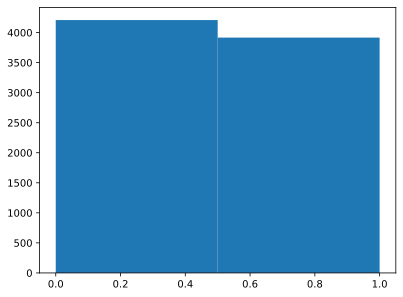

In [567]:
import matplotlib.pyplot as plt
plt.hist(y_df, bins=2);

In [568]:
df = df.drop(['Target'], axis=1)

In [569]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8124 entries, p to e
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring    8124 n

In [570]:
print('Try to encode the Category dataset')

Try to encode the Category dataset


In [571]:
cat_cols = df.select_dtypes(include='object').columns
df = df[cat_cols]

In [572]:
uniques = {col: df[col].unique() for col in df.columns}

In [573]:
print(uniques)

{'cap-shape': array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object), 'cap-surface': array(['s', 'y', 'f', 'g'], dtype=object), 'cap-color': array(['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r'], dtype=object), 'bruises': array(['t', 'f'], dtype=object), 'odor': array(['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'], dtype=object), 'gill-attachment': array(['f', 'a'], dtype=object), 'gill-spacing': array(['c', 'w'], dtype=object), 'gill-size': array(['n', 'b'], dtype=object), 'gill-color': array(['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o'],
      dtype=object), 'stalk-shape': array(['e', 't'], dtype=object), 'stalk-root': array(['e', 'c', 'b', 'r', '?'], dtype=object), 'stalk-surface-above-ring': array(['s', 'f', 'k', 'y'], dtype=object), 'stalk-surface-below-ring': array(['s', 'f', 'y', 'k'], dtype=object), 'stalk-color-above-ring': array(['w', 'g', 'p', 'n', 'b', 'e', 'o', 'c', 'y'], dtype=object), 'stalk-color-below-ring': array(['w', 'p', 'g', 'b', 'n', 'e', 'y', 'o', 

In [574]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    encoded_df[col] = le.fit_transform(df[col])
encoded_df.head()

,cap-shape_0,cap-shape_1,cap-shape_2,cap-surface_0,cap-surface_1,cap-surface_2,cap-color_0,cap-color_1,cap-color_2,cap-color_3,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
p,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,2,7,7,0,2,1,4,2,3,5
e,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,7,7,0,2,1,4,3,2,1
e,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,2,7,7,0,2,1,4,3,2,3
p,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,2,7,7,0,2,1,4,2,3,5
e,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,2,7,7,0,2,1,0,3,0,1


In [575]:
print("Dataset features normalization")
scaler = MinMaxScaler()
for c in encoded_df.columns:
    encoded_df[c] = scaler.fit_transform(encoded_df[[c]])

Dataset features normalization


In [576]:
encoded_df.head()

,cap-shape_0,cap-shape_1,cap-shape_2,cap-surface_0,cap-surface_1,cap-surface_2,cap-color_0,cap-color_1,cap-color_2,cap-color_3,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
p,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.250,0.6,0.833333
e,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.375,0.4,0.166667
e,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.375,0.4,0.500000
p,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.250,0.6,0.833333
e,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.666667,0.875,0.875,0.0,0.666667,0.5,0.0,0.375,0.0,0.166667


In [577]:
x_train, x_test, y_train, y_test = train_test_split(encoded_df, y_df, test_size=0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.3, random_state=17)
print('Lengths:', len(x_train), len(x_valid), len(x_test))
clf = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)
clf = clf.fit(x_train, y_train)
acc, pr, rc, f1 = check_classification_model(clf, x_valid, y_valid)
print(f'Linear regression model validation metrics: Accuracy: {acc} Precision: {pr} Recall: {rc} F-score: {f1}')

Lengths: 4549 1950 1625
Confusion matrix:
[[1008    4]
 [   3  935]]
Linear regression model validation metrics: Accuracy: 0.9964102564102564 Precision: 0.9963863950221683 Recall: 0.9964245682934846 F-score: 0.9964052185166272


In [578]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_cols = ohe.fit_transform(df)
header = ohe.get_feature_names_out(df.columns.tolist())
encoded_df = pd.DataFrame(encoded_cols.toarray(), columns = header)
encoded_df.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [579]:
print("Dataset features normalization")
scaler = MinMaxScaler()
for c in encoded_df.columns:
    encoded_df[c] = scaler.fit_transform(encoded_df[[c]])

Dataset features normalization


In [580]:
x_train, x_test, y_train, y_test = train_test_split(encoded_df, y_df, test_size=0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.3, random_state=17)
print('Lengths:', len(x_train), len(x_valid), len(x_test))
clf = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)
clf = clf.fit(x_train, y_train)
acc, pr, rc, f1 = check_classification_model(clf, x_valid, y_valid)
print(f'Linear regression model validation metrics: Accuracy: {acc} Precision: {pr} Recall: {rc} F-score: {f1}')

Lengths: 4549 1950 1625
Confusion matrix:
[[1036    0]
 [   0  914]]
Linear regression model validation metrics: Accuracy: 1.0 Precision: 1.0 Recall: 1.0 F-score: 1.0


In [581]:
import category_encoders as ce
be = ce.BinaryEncoder(cols=df.columns.tolist())
encoded_df = be.fit_transform(df)
encoded_df.head()

,cap-shape_0,cap-shape_1,cap-shape_2,cap-surface_0,cap-surface_1,cap-surface_2,cap-color_0,cap-color_1,cap-color_2,cap-color_3,...,spore-print-color_0,spore-print-color_1,spore-print-color_2,spore-print-color_3,population_0,population_1,population_2,habitat_0,habitat_1,habitat_2
p,0,0,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
e,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
e,0,1,0,0,0,1,0,0,1,1,...,0,0,1,0,0,1,0,0,1,1
p,0,0,1,0,1,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1
e,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,1,1,0,1,0


In [582]:
print("Dataset features normalization")
scaler = MinMaxScaler()
for c in encoded_df.columns:
    encoded_df[c] = scaler.fit_transform(encoded_df[[c]])

Dataset features normalization


In [583]:
x_train, x_test, y_train, y_test = train_test_split(encoded_df, y_df, test_size=0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.3, random_state=17)
print('Lengths:', len(x_train), len(x_valid), len(x_test))
clf = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)
clf = clf.fit(x_train, y_train)
acc, pr, rc, f1 = check_classification_model(clf, x_valid, y_valid)
print(f'Linear regression model validation metrics: Accuracy: {acc} Precision: {pr} Recall: {rc} F-score: {f1}')

Lengths: 4549 1950 1625
Confusion matrix:
[[965   7]
 [  3 975]]
Linear regression model validation metrics: Accuracy: 0.9948717948717949 Precision: 0.9948862584369897 Recall: 0.9948654346234442 F-score: 0.9948716600042078


In [584]:
oe = ce.OrdinalEncoder(cols=df.columns.tolist())
encoded_df = oe.fit_transform(df)
encoded_df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
p,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
e,1,1,2,1,2,1,1,2,1,1,...,1,1,1,1,1,1,1,2,2,2
e,2,1,3,1,3,1,1,2,2,1,...,1,1,1,1,1,1,1,2,2,3
p,1,2,3,1,1,1,1,1,2,1,...,1,1,1,1,1,1,1,1,1,1
e,1,1,4,2,4,1,2,2,1,2,...,1,1,1,1,1,1,2,2,3,2


In [585]:
print("Dataset features normalization")
scaler = MinMaxScaler()
for c in encoded_df.columns:
    encoded_df[c] = scaler.fit_transform(encoded_df[[c]])

Dataset features normalization


In [586]:
x_train, x_test, y_train, y_test = train_test_split(encoded_df, y_df, test_size=0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.3, random_state=17)
print('Lengths:', len(x_train), len(x_valid), len(x_test))
clf = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)
clf = clf.fit(x_train, y_train)
acc, pr, rc, f1 = check_classification_model(clf, x_valid, y_valid)
print(f'Linear regression model validation metrics: Accuracy: {acc} Precision: {pr} Recall: {rc} F-score: {f1}')

Lengths: 4549 1950 1625
Confusion matrix:
[[988  34]
 [ 31 897]]
Linear regression model validation metrics: Accuracy: 0.9666666666666667 Precision: 0.9665290732790197 Recall: 0.9666633629124772 F-score: 0.9665939156385017


In [587]:
se = ce.SumEncoder(cols=df.columns.tolist())
encoded_df = se.fit_transform(df)
encoded_df.head()

C:\Program Files\Python310\lib\site-packages\category_encoders\base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
C:\Program Files\Python310\lib\site-packages\category_encoders\base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


,intercept,cap-shape_0,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-surface_0,cap-surface_1,cap-surface_2,cap-color_0,...,population_1,population_2,population_3,population_4,habitat_0,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5
p,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
e,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
e,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
p,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
e,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [588]:
print("Dataset features normalization")
scaler = MinMaxScaler()
for c in encoded_df.columns:
    encoded_df[c] = scaler.fit_transform(encoded_df[[c]])

Dataset features normalization


In [589]:
x_train, x_test, y_train, y_test = train_test_split(encoded_df, y_df, test_size=0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.3, random_state=17)
print('Lengths:', len(x_train), len(x_valid), len(x_test))
clf = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)
clf = clf.fit(x_train, y_train)
acc, pr, rc, f1 = check_classification_model(clf, x_valid, y_valid)
print(f'Linear regression model validation metrics: Accuracy: {acc} Precision: {pr} Recall: {rc} F-score: {f1}')

Lengths: 4549 1950 1625
Confusion matrix:
[[1004    0]
 [   1  945]]
Linear regression model validation metrics: Accuracy: 0.9994871794871795 Precision: 0.9995024875621891 Recall: 0.9994714587737843 F-score: 0.9994867095952928
